<h1><center> SVM (Classification) </center></h1>

## Livrable:  

- Présentation (ppt) de 6 slides maximum, qui contient le principe de l'algorithme avec des schémas explicatifs +
  une description du jeu des données (iris)

- Le Notebook

## 1. Importation des bibliothèques

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix

## 2. Télechargement et manipulation du jeu de données 

1. Vous allez charger le jeu de données iris directement via une fonction de la bibliothèque Scikit-Learn. Il existe dans le sous-module datasets du module sklearn.

In [5]:
iris = datasets.load_iris()

2. Affichez le nom des features de ce jeux de données

In [11]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [13]:
print("liste des features :", iris.feature_names)

liste des features : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


3. Affichez les valeurs de la variable target de ce jeu de données, qu'est ce que vous remarquez ?

In [16]:
print("valeurs des targets :", iris.target_names)

valeurs des targets : ['setosa' 'versicolor' 'virginica']


In [14]:
print("valeurs des target :", iris.target)

valeurs des target : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Les targets ont été encodées.

## 3. Séparation du jeu de données (Features & Target)

1. Stockez les features dans une variable "X" (prenez que les deux premiers features) et la target dans une variable "Y"

In [20]:
X = iris.data[:,:2]
Y = iris.target

2. Écrivez un code qui permer de stocker les données de test (30%) / d’apprentissage et les classes de test (30%) /d’apprentissage dans 4 variables

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=9)

## 2.Creation du modèle, évaluation et visualisation

1. Pour l’apprentissage des données, nous allons utiliser le modèle Support Vector Classification(SVC). Utiliser ce modèle pour la prédiction.

   Pour plus d'information: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [31]:
svcc = svm.SVC(C=1.0, kernel='rbf', gamma='scale')

In [34]:
svcc.fit(X_train, Y_train)
svcc.score(X_train, Y_train)

0.7904761904761904

2. Affin de choisir les meilleurs paramètres du modèle, appliquez une recherche, de type GridSearch sur les paramètres gamma, C et kernel du modèle SVC. Optez pour une valeur de 10 pour "cv" (une validation croisée de type 10-fold cross-validation)

In [123]:
parametres = {
'kernel': ('poly', 'rbf', 'sigmoid', 'linear'),
'gamma': ('scale', 'auto'),
'C': (10.0, 15, 20, 25.0, 30, 200)
}

In [124]:
clf = GridSearchCV(estimator=svcc, param_grid=parametres, cv=10, verbose=True)

 2. Affichez les meilleurs paramètres de modèle

In [125]:
clf.fit(X_train, Y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:   22.0s finished


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': (10.0, 15, 20, 25.0, 30, 200),
                         'gamma': ('scale', 'auto'),
                         'kernel': ('poly', 'rbf', 'sigmoid', 'linear')},
             verbose=True)

In [126]:
clf.best_params_

{'C': 20, 'gamma': 'auto', 'kernel': 'poly'}

3. Entraînez votre modèle avec ces paramètres sur les données d'apprentissage et affichez son score

In [131]:
svcc2 = svm.SVC(C=20.0, kernel='poly', gamma='auto')

In [132]:
svcc2.fit(X_train, Y_train)

SVC(C=20.0, gamma='auto', kernel='poly')

In [133]:
svcc2.score(X_train, Y_train)

0.780952380952381

4. Affichez les prédictions de votre modèle sur vos données de test.

In [135]:
Y_pred = svcc2.predict(X_test)

5. Affichez la matrice de confusion, qu'est ce que vous remarquez ?

In [136]:
cmat = confusion_matrix(Y_test, Y_pred)

In [137]:
print(cmat)

[[18  0  0]
 [ 0 11  3]
 [ 0  3 10]]


6. Visualisez les résultats de votre modèle de classification sur les données d'entrainement

In [202]:
Y_pred_train = svcc2.predict(X_train)

Text(0.5, 1.0, 'Etude des sépales')

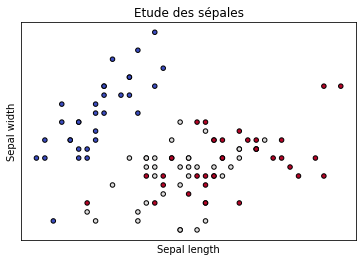

In [203]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xticks(())
plt.yticks(())
plt.title('Etude des sépales')

In [204]:
def make_meshgrid(x, y, h=.01):
    x_min, x_max = x.min() - 0.1, x.max() + 0.1
    y_min, y_max = y.min() - 0.1, y.max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

In [205]:
xx, yy = make_meshgrid(X_train[:,0], X_train[:,1])
print("forme de xx et yy :", xx.shape, "-- après aplatissement ils auront la forme :", xx.shape[0]*xx.shape[1])

forme de xx et yy : (240, 380) -- après aplatissement ils auront la forme : 91200


In [211]:
var = np.c_[xx.ravel(), yy.ravel()]
print(var.shape)

(91200, 2)


In [212]:
Z = svcc2.predict(var)
print(Z.shape)

(91200,)


In [213]:
Z = Z.reshape(xx.shape)
print(Z.shape)

(240, 380)


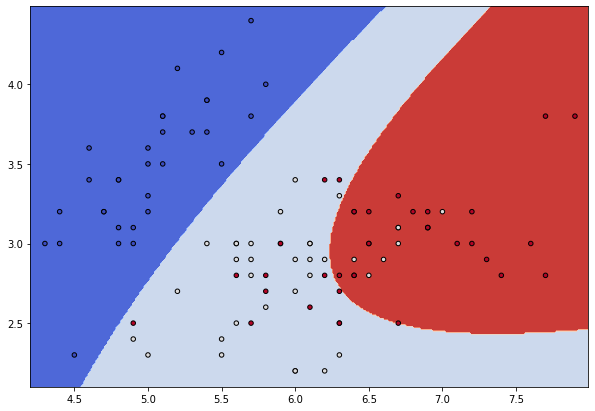

In [228]:
plt.figure(figsize=(10,7))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')